# <font color='289C4E'>Projet 8: Propriétés spatiales des tables de hachage universelles
**Élèves**: Gabriel CARVALHO & Yong MOK

## <font color='289C4E'>Table de matières<font><a class='anchor' id='top'></a>
- [Python Imports](#imports)
- [Partie 1 - Table de hachage: présentation](#Partie1)
    - [Question S1](#S1)
    - [Question S2](#S2)
    - [Question S3](#S3)
- [Partie 2 - Hypothèse de hachage uniforme simple](#Partie2)
    - [Question T1](#T1)
    - [Question S4](#S4)
    - [Question T2](#T2)
    - [Question T3](#T3)
    - [Question T4](#T4)
- [Partie 3 - Méthode de hachage universel](#Partie3)
    - [Question T5](#T5)
    - [Question T6](#T6)
    - [Question T8](#T8)
    - [Question S5](#S5)
    - [Question T9](#T9)
    - [Question T10](#T10)
    - [Question S6](#S6)
- [Partie 4 - Méthode de hachage parfait](#Partie4)
    - [Question S7](#S7)
    - [Question T11](#T11)
    - [Question T12](#T12)
    - [Question S8](#S8)
- [Reférences](#myrefs)

<h2 align="center"> <font color='gray'>Python Imports</font></h2> <a class="anchor" id="imports"></a>

Dans cette section, on va importer tous les paquets qu'on ira utiliser plus tard.

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps

<h2 align="center"> <font color='gray'>Partie 1 - Table de hachage: présentation</font></h2><a class="anchor" id="Partie1"></a>

<h3 align="center"> <font color='blue'>Question S1</font></h3> <a class="anchor" id="S1"></a>

<div class="alert alert-block alert-info">
Écrire un programme qui, étant donné une table de hachage, une fonction de hachage et une donnée, modifie la table en insérant la donnée dans la bonne alvéole. Vous pouvez supposer que les données sont de type <b>Int</b>.

Appliquer votre programme pour insérer la donnée 7 via la fonction de hachage $h(n) = \lfloor\frac{n}{4}\rfloor$ (où $\lfloor x \rfloor$ est la partie entière de x) dans la table de hachage suivante (et afficher la table ainsi obtenue)
</div>

Pour ajouter une donnée $d$ dans la table de hachage $t$, on va:
1. calculer l'alvéole $h(d)$ où on va ajouter la donnée $d$.
2. ajouter $d$ dans l'alvéole $t[h(d)]$

In [12]:
def ajouterDonnee(tableHachage,
                  fonctionHachage,
                  donnee):
    alveole = fonctionHachage(donnee)
    tableHachage[alveole].append(donnee)

Dans l'exemple, on note que $h(7) = 1$. Donc, la donnée $7$ doit être ajouté à l'alvéole $t[1]$.

In [17]:
t = [[1,3,2,0],
     [6],
     [],
     [],
     [17,18]]

h = lambda d : math.floor(d/4)

ajouterDonnee(t, h, 7)
print(t)#on note que 7 est dans la bonne position

[[1, 3, 2, 0], [6, 7], [], [], [17, 18]]


<h3 align="center"> <font color='blue'>Question S2</font></h3> <a class="anchor" id="S2"></a>

<div class="alert alert-block alert-info">
Écrire un programme qui, étant donné une table de hachage (implémentée comme expliqué plus haut), une fonction de hachage et une donnée, teste si la donnée est présente dans la table. Vous pouvez supposer que les données sont de type <b>Int</b>. Vérifier votre programme en testant successivement la présence des données 7, 15 et 18 dans la table obtenue à la fin de S1.  
</div>

Pour chercher une donnée $d$ dans la table de hachage $t$, on va:
1. calculer l'alvéole $h(d)$ où chercher la donnée $d$.
2. utiliser la fonction *list.index()* pour trouver la donnée $d$ si elle est présente.
3. si la donnée a été trouvé, on retorne **True**, sinon on retorne **False**.

In [28]:
def chercherDonnee(tableHachage,
                   fonctionHachage,
                   donnee):
    alveole = fonctionHachage(donnee)
    try:
        cherche = tableHachage[alveole].index(donnee)
        return True
    except:
        return False

Dans l'exemple, on note que $7$ et $18$ sont présentes dans la table de hachage, mais $15$ ne l'est pas.

In [29]:
chercherDonnee(t, h, 7)

True

In [30]:
chercherDonnee(t, h, 15)

False

In [31]:
chercherDonnee(t, h, 18)

True

<h3 align="center"> <font color='blue'>Question S3</font></h3> <a class="anchor" id="S3"></a>

<div class="alert alert-block alert-info">
    Écrire un programme qui, étant donné une <i>List</i> d’entiers compris entre $0$ et $19$, construit la table de hachage à $5$ alvéoles associée à la fonction de hachage $h(n) = \lfloor\frac{n}{4}\rfloor$, telle que chaque donnée ne soit présente qu’une fois dans la table (même si la donnée est présente en double dans la <i>List</i>). Il ne sera pas nécessaire de vérifier que les entiers de la List sont compris entre $0$ et $19$.
    Utiliser votre programme pour constuire la table (que vous afficherez) otenue par insertion successives des données suivante (dans cet ordre) : $5$, $1$, $7$, $6$, $5$, $9$, $15$, $0$, $18$.
</div>

Pour construir la table de hachage, on va:
1. initialiser une table vide avec $5$ alvéoles
2. pour chaque donnée, vérifier si elle est présente dans la table de hachage
3. si la donnée n'est pas présente, on l'ajoute

In [35]:
def construirTableHachage(donnees,
                          fonctionHachage):
    tableHachage = [[] for i in range(5)]
    for donnee in donnees:
        if chercherDonnee(tableHachage, h, donnee) == False:
            ajouterDonnee(tableHachage, h, donnee)
    return tableHachage

Dans l'exemple, on note que:

- $h(1) = h(0) = 0$
- $h(5) = h(7) = h(6) = 1$
- $h(9) = 2$
- $h(15) = 3$
- $h(18) = 4$

Donc, à la fin on doit trouver la table

$\begin{align}
t = [&[1,0],\\
    &[5,7,6],\\
    &[9],\\
    &[15],\\
    &[18]]
\end{align}$



In [38]:
donnees = [5,1,7,6,5,9,15,0,18]
construirTableHachage(donnees, h)#comme attendu

[[1, 0], [5, 7, 6], [9], [15], [18]]

<h2 align="center"> <font color='gray'>Partie 2 - Hypothèse de hachage uniforme simple</font></h2><a class="anchor" id="Partie2"></a>

<h3 align="center"> <font color='blue'>Question T1</font></h3> <a class="anchor" id="T1"></a>

<div class="alert alert-block alert-info">
Supposons que $D_0,...,D_{n−1}$ sont i.i.d. de loi $\mathcal{U}([0, 1[)$, et $h:d \in [0, 1[ \to \lfloor dm \rfloor$. Montrer que l’hypothèse de hachage uniforme simple (HHUS) est vérifiée.
</div>

On note que $$\forall j \in [\![0,m]\!] \quad h(d) = j \iff dm - 1 < j \leq dm.$$

Donc, on a la condition suivante $$\frac{j}{m} \leq d < \frac{j+1}{m}.$$

Alors, $$\mathbb{P}(h(D_i) = j) = \mathbb{P}\left(\frac{j}{m} \leq D_i < \frac{j+1}{m}\right) = \frac{1}{m}.$$

On conclue que $h(D_i) \sim \mathcal{U}([\![0,m]\!])$. On note que les $h(D_i)$ sont indépendantes car les $D_i$ sont indépendantes.

On note encore que $$\forall i\not =j \quad \mathbb{P}(D_i \not= D_j) = 1$$ car la mesure de Lebesgue ne charge pas les points.

<h3 align="center"> <font color='blue'>Question S4</font></h3> <a class="anchor" id="S4"></a>

<div class="alert alert-block alert-info">
La table de hachage obtenue à <b>T1</b> est aléatoire (car les données sont des v.a.). Écrire un programme qui simule cette table de hachage aléatoire avec $m = 5$ alvéoles en y insérant $n = 1000$ données i.i.d. de loi $\mathcal{U}([0, 1[)$. Utiliser votre programme pour simuler une telle table, puis afficher la taille de ses alvéoles à l’aide d’un histogramme.
</div>

Pour simuler la table de hachage aléatoire proposée, on va:
1. Simuler les réalisations $D_0,...,D_n-1$
2. Construir la table de hachage avec la fonction de [S3](#S3)

**Remarque:** Pour simuler les réalisation de la loi uniforme $\mathcal{U}([0,1[)$ on utilisera la fonction *rand()* du paquet *numpy.random*.

In [47]:
nombreRealisations = 1000
nombreAlveoles = 5

donnees = npr.rand(nombreRealisations)

h = lambda d : math.floor(d*nombreAlveoles)

tableHachage = construirTableHachage(donnees, h)

tailleAlveoles = [len(tableHachage[i]) for i in range(5)]

Pour construir un histogramme, on va utiliser le paquet *matplotlib.pyplot*. On note que ce qu'on attend c'est que tout les alvéoles aient la même taille une fois que la fonction de hachage suit une loi uniforme $\mathcal{U}([\![0,m]\!])$.

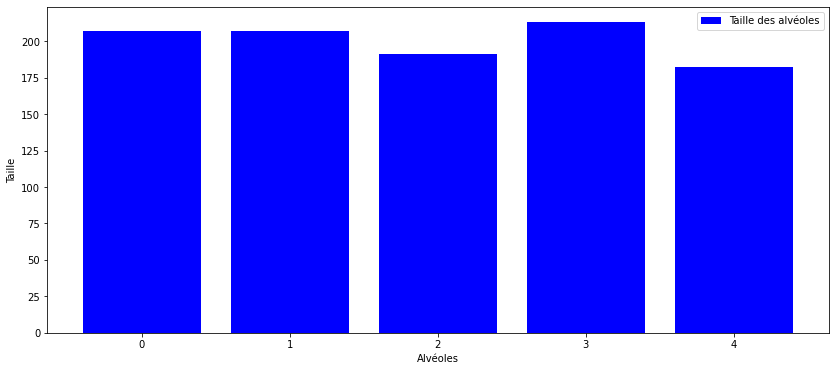

In [49]:
x = range(5)#répresente chaque alvéole(axe x)
y = tailleAlveoles#répresente la taille de chaque alvéole(axe y)

plt.figure(figsize=(14,6))
plt.bar(x, y, color='blue', label = 'Taille des alvéoles')
plt.xlabel("Alvéoles")
plt.ylabel("Taille")
plt.legend()

<h3 align="center"> <font color='blue'>Question T2</font></h3> <a class="anchor" id="T2"></a>

<div class="alert alert-block alert-info">
Supposons que l’<i>HHUS</i> est vérifiée. Pour $0 \leq i, j \leq n − 1$, donner la probabilité que les données
$D_i$ et $D_j$ soient hachées dans la même alvéole.
    
Donner la loi de $N_j$($0 \leq j \leq m − 1$).
</div>

Les données $D_i$ et $D_j$ sont hachées dans la même alvéole $\iff h(D_i) = h(D_j)$. Donc, on veut calculer $\mathbb{P}(h(D_i) = h(D_j))$.

$\begin{align}
\mathbb{P}(h(D_i) = h(D_j)) &= \sum_{k=0}^{m-1} \mathbb{P}(h(D_i) = h(D_j)|h(D_j) = k)\cdot\mathbb{P}(h(D_j) = k)\\
&= \sum_{k=0}^{m-1} \mathbb{P}(h(D_i) = k)\cdot\mathbb{P}(h(D_j) = k) \quad \text{car $D_i$ et $D_j$ sont indépendantes.}\\
&= \sum_{k=0}^{m-1} \frac{1}{m^2}\\
&= \frac{1}{m}
\end{align}$

On note que $\mathfrak{1}_{\{h(D_i) = j\}} \sim \mathcal B\left(\frac{1}{m}\right)$ une loi de Bernoulli. Donc,

$$
N_j = \sum_{i=0}^{n-1} \mathfrak{1}_{\{h(D_i) = j\}} \sim B\left(n, \frac{1}{m}\right) \text{une loi binomiale.}
$$

<h3 align="center"> <font color='blue'>Reférences</font></h3> <a class="anchor" id="myrefs"></a>